# This is an Exploratory Data Analysis for the matches.csv file available in the Datasets Directory.🏏


## What is Exploratory Data Analysis?

* Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.
* In data science, it is often used as a starting point to gain insights about the dataset and understanding the features of the dataset.
* Data visualization is a very important part in data science as data nowadays is like oil, it increases continuosly and if it is not represented properly, valuable points/insights may be lost.
* Note: EDA's often tend to be different from person to person even if the dataset is same. Which is an advantage as we get to lok at the same dataset with different opinions and can acknowledge and understand the facts better.


## What is IPL?

The Indian Premier League is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities or states in India. Basically, a gala for cricket fans.



In [75]:
import numpy as np
import pandas as pd

In [76]:
matches=pd.read_csv('matches.csv')

Displaying first 5 rows of the dataset for easier visibility.

In [77]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [78]:
matches.shape

(636, 18)

Total number of matches played (according to this file) is *636 matches*.

## Number of matches played per season

In [79]:
from collections import Counter
seasons=matches['season'].to_list()
count_seasons=Counter(seasons)
fig = px.pie(names=list(count_seasons.keys()),values=list(count_seasons.values()))
fig.show()

Therefore, the number matches is more or less the same in each year/season. This is quite normal as mostly the duration is also same.

## Which stadium was used the most?

In [80]:
venues=matches['venue'].to_list()
venue_count=Counter(venues)
venue_count={k: v for k, v in sorted(venue_count.items(), key=lambda item: item[1])}

import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            y=list(venue_count.keys()),
            x=list(venue_count.values()),
            orientation='h',
marker=dict(
        color='rgba(255, 6, 0, 0.6)'    )))

fig.show()

Interestingly, the most used stadium was M Chinnaswamy Stadium which was used about 66 times, followed by the Feroz Shah stadium.
The OUTsurance Oval was the least used stadium.

## Which team won the most tosses?

In [83]:
toss=matches['toss_winner'].to_list()
toss_count=Counter(toss)
toss_count={k: v for k, v in sorted(toss_count.items(), key=lambda item: item[1])}
fig = px.bar(x=list(toss_count.keys()), y=list(toss_count.values()))
fig.show()

Mumbai Indians has won the most tosses on the field followed by KKR. That is very interesting. The Rising Pune Supergiant don't seem to be winning many tosses though.

## Does a winning team decide to field /bat?

In [82]:
px.pie(names = matches.toss_decision.value_counts().index ,values =  matches.toss_decision.value_counts().values,title = "Fielding or Batting")

So, the winning team mostly chooses to field rather than bat. About 57% of the time, the winning team prefers to bat rather than ball.

# Now for the most interesting, Who wins the most matches?

In [87]:
win=matches['winner'].to_list()
win_count=Counter(win)
win_count={k: v for k, v in sorted(win_count.items(), key=lambda item: item[1])}
fig = px.bar(color=list(win_count.values()),x=list(win_count.keys()), y=list(win_count.values()))
fig.show()

Mumbai Indians and Chennai Super Kings are the winners followed by Kolkata Knight Riders. 🏏

## Top 5 players to get man of the match award:

In [88]:
matches.player_of_match.value_counts().head(5)

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
RG Sharma         14
Name: player_of_match, dtype: int64

Chris Gayle, YK Pathan, AB de Villiers, DA Warner and RG Sharma are the players who have received the highest number of man of the match awards!

## Lastly, which city holds the matches the least and the most?

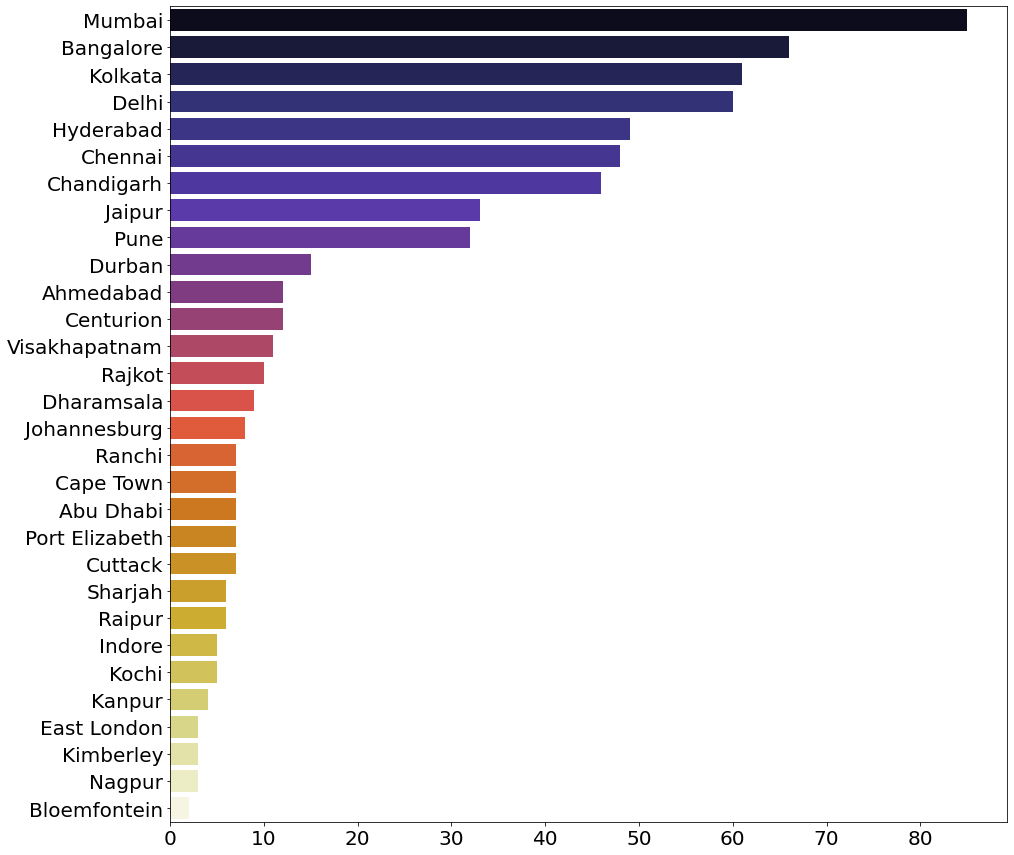

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,15)
sns.barplot(y = matches.city.value_counts().index ,x = matches.city.value_counts().values,orient = "h",palette = 'CMRmap')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.show()

Mumbai and Bangalore are the top hosts for the matches. This can also be because of the large stadiums available in the two places. However,Kolkata and Delhi are third and fourth most, respectively.

In [ ]:
This notebook is just an introduction to gain basic insights. I